In [1]:
import numpy as np
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep='\t',names=["label", "message"])

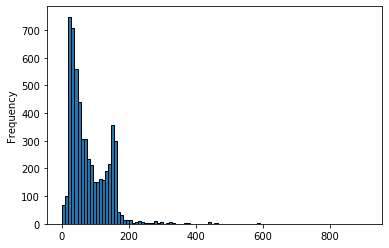

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
messages['length'] = messages['message'].apply(len)
messages['length'].plot.hist(bins=100,histtype='bar',ec='black')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD11313B70>,
      dtype=object)

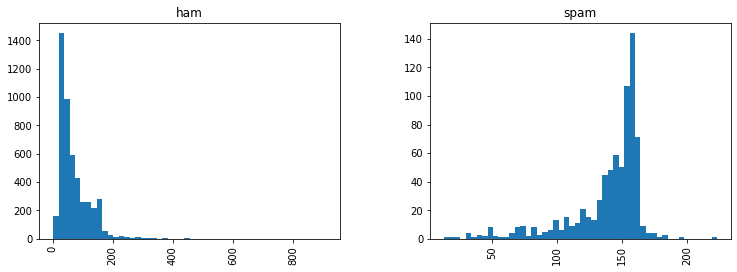

In [4]:
messages.hist(column='length', 
              by='label', 
              bins=50,
              figsize=(12,4))

In [5]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [8]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
messages_bow = bow_transformer.transform(messages['message'])

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [13]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

# Let's check out the output
message4 = messages['message'][3]
bow4 = bow_transformer.transform([message4])
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [14]:
from sklearn.metrics import classification_report

all_predictions = spam_detect_model.predict(messages_tfidf)
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [15]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [16]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

pipeline.fit(msg_train,label_train)

predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1008
        spam       0.69      1.00      0.81       107

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.84      0.98      0.89      1115
weighted avg       0.97      0.96      0.96      1115

